# Datenverständnis

In diesem Notebook werden unbereinigte Datensätze analysiert.

Der Datensatz wird beschrieben und es werden Informationen wie die Sterneverteilung, durchschnittliche Bewertung und die durchschnittliche Anzahl der Bewertungen pro Artikel geliefert.

### Import

In [4]:
import pandas as pd
import gzip
import seaborn as sns

### Erzeugen eines Data Frames

In [5]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

def data_understanding_1(path):
    return getDF(path)

#### Einlesen der Daten

*Die Variable "path" muss durch den Pfad der Datei ersetzt werden.*

In [6]:
df=data_understanding_1('../Data_raw/reviews_Musical_Instruments_5.json.gz')

### Analyse des Data Frames

#### Sterneverteilung

In [15]:
df["overall"].value_counts().sort_index()

1.0     217
2.0     250
3.0     772
4.0    2084
5.0    6938
Name: overall, dtype: int64

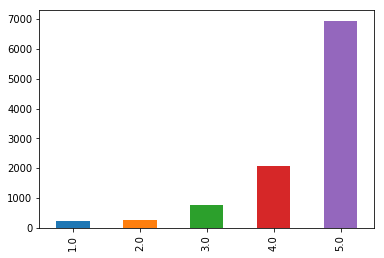

In [14]:
df.overall.value_counts().sort_index().plot.bar();

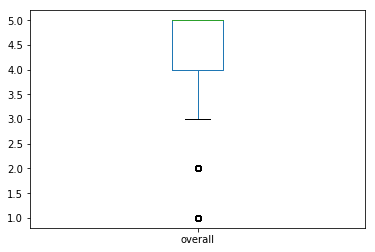

In [16]:
df.overall.plot.box();

#### Durchschnittliche Bewertungen pro Artikel

In [27]:
df["asin"].count()/(df["asin"].value_counts().count())

11.401111111111112

#### Durchschnittliche Bewertung

In [8]:
df["overall"].sum()/df.shape[0]

4.488743787155248

#### Anzahl Zeilen und Spalten

In [9]:
df.shape

(10261, 9)

#### Information der Daten

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10261 entries, 0 to 10260
Data columns (total 9 columns):
reviewerID        10261 non-null object
asin              10261 non-null object
reviewerName      10234 non-null object
helpful           10261 non-null object
reviewText        10261 non-null object
overall           10261 non-null float64
summary           10261 non-null object
unixReviewTime    10261 non-null int64
reviewTime        10261 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 801.6+ KB


#### Beschreibung der Daten

In [11]:
df.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


#### Auf Nullwerte überprüfen

In [12]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

#### Header der Daten

In [13]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


### Zusammenfassende Funktion

In [23]:
import pandas as pd
import gzip
import numpy as np

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

def data_understanding_1(path,name):
    df = getDF(path)

    # Sterneverteilung
    a=df["overall"].value_counts().sort_index()
    
    #Median der Sterneverteilung
    d=np.median(df["overall"])

    # Durchschnittliche Anzahl Bewertungen pro Artikel
    b=df["asin"].count()/(df["asin"].value_counts().count())

    # Durchschnittliche Bewertung
    c=df["overall"].sum()/df.shape[0]
    
    #Anzahl der Artikel im Datensatz
    e=df["asin"].value_counts().count()
    
    f=df["overall"].value_counts(normalize=True).values.tolist()
    
    g=round(f[0],2)
    h=round(f[1],2)
    i=round(f[2],2)
    j=round(f[3],2)
    k=round(f[4],2)
    

    data = {"Datensatz":[name],'Durchschnittliche Anzahl an Bewertungen': [b], "Durchschnittliche Bewertung": [c],"Median der Bewertung":[d],"Anzahl an Artikeln":[e],"Prozentualer Anteil 5-Sterne Bewertungen":[g],"Prozentualer Anteil 4-Sterne Bewertungen":[h],"Prozentualer Anteil 3-Sterne Bewertungen":[i],"Prozentualer Anteil 2-Sterne Bewertungen":[j],"Prozentualer Anteil 1-Sterne Bewertungen":[k]}
    df2 = pd.DataFrame(data=data)
    df2.to_csv("./data_rumprobieren/%s.csv" %name, sep=',',index=False)
    return df2

In [24]:
data_understanding_1("../Data_raw/reviews_Amazon_Instant_Video_5.json.gz", "Amazon_Instant_Video")

,Datensatz,Durchschnittliche Anzahl an Bewertungen,Durchschnittliche Bewertung,Median der Bewertung,Anzahl an Artikeln,Prozentualer Anteil 5-Sterne Bewertungen,Prozentualer Anteil 4-Sterne Bewertungen,Prozentualer Anteil 3-Sterne Bewertungen,Prozentualer Anteil 2-Sterne Bewertungen,Prozentualer Anteil 1-Sterne Bewertungen
0,Amazon_Instant_Video,22.033234,4.20953,5.0,1685,0.56,0.23,0.11,0.05,0.05
